In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_context('talk')
sns.set_style("darkgrid")

<h4 style="font-size: 18px;font-family:Times New Roman">Load the dataset and perform data preprocessing</h4>

In [170]:
#Load the dataset from the csv file.
df = pd.read_csv("Churn.csv")
display(df.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
1309,137,0,174.0,161.3,260.7,11.4,2,no,yes,no,...,29.58,115,13.71,98,11.73,3,3.08,NY,415,389-2540
2913,185,0,139.6,250.2,158.1,10.8,1,no,no,no,...,23.73,115,21.27,79,7.11,4,2.92,CA,408,358-4036
1687,90,0,37.8,155.3,175.0,14.2,3,no,no,no,...,6.43,105,13.20,111,7.88,5,3.83,CT,415,334-4438
960,5,0,199.2,187.3,214.0,13.3,3,no,no,no,...,33.86,12,15.92,85,9.63,3,3.59,AR,415,380-2758
1361,64,0,206.2,232.4,251.6,13.6,1,no,no,no,...,35.05,76,19.75,96,11.32,2,3.67,WY,415,385-1985


In [171]:
df.info()
print("Shape of the dataset = ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [172]:
#Removing the unnecessary column from the dataset

df = df.drop(["Area_Code","Phone","State"],axis=1)
display(df.sample(5))
df.shape

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
2274,74,31,249.4,209.5,180.6,9.9,4,no,no,yes,70,42.40,59,17.81,75,8.13,2,2.67
1974,113,20,157.8,161.5,271.5,8.7,5,yes,no,yes,83,26.83,56,13.73,100,12.22,2,2.35
2003,33,0,190.6,161.7,189.9,13.0,1,no,yes,no,100,32.40,104,13.74,136,8.55,6,3.51
900,72,29,139.8,138.2,221.0,5.5,0,no,yes,yes,114,23.77,91,11.75,88,9.95,6,1.49
568,108,0,293.0,160.6,143.9,10.0,2,no,no,no,88,49.81,101,13.65,87,6.48,6,2.70


(3333, 18)

In [173]:
#count the number of unique values and datatypes of catagorical variable

print(df["Churn"].value_counts())
print("Data types of Churn =",df["Churn"].dtypes)

print(df["Intl_Plan"].value_counts())
print("Data types of Intl_Plan =",df["Intl_Plan"].dtypes)

print(df["Intl_Plan"].value_counts())
print("Data types of Vmail_Plan =",df["Vmail_Plan"].dtypes)

no     2850
yes     483
Name: Churn, dtype: int64
Data types of Churn = object
no     3010
yes     323
Name: Intl_Plan, dtype: int64
Data types of Intl_Plan = object
no     3010
yes     323
Name: Intl_Plan, dtype: int64
Data types of Vmail_Plan = object


In [174]:
target = ["Churn"]
X = df.drop("Churn",axis=1)    #removing the Churn column from the dataset
y = df[target]

display(X.head())
print("Shape of X =",X.shape)

display(y.sample(5))
print("Shape of y =",y.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,yes,no,113,28.34,122,12.61,121,8.41,3,2.73


Shape of X = (3333, 17)


,Churn
1270,no
1955,no
453,no
386,no
165,no


Shape of y = (3333, 1)


<h4 style="font-size: 18px;font-family:Times New Roman; color:purple">Label Encoding Using replace method</h4>

In [175]:
y["Churn"] = y["Churn"].replace({"yes":1,"no":0})
display(y.head(5))
print(y.shape)

X["Intl_Plan"] = X["Intl_Plan"].replace({"yes":1,"no":0})
X["Vmail_Plan"] = X["Vmail_Plan"].replace({"yes":1,"no":0})
display(X.head(5))
print(X.shape)

,Churn
0,0
1,0
2,0
3,0
4,0


(3333, 1)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


(3333, 17)


<h4 style="font-size: 18px;font-family:Times New Roman; color:purple">One-hot Encoding </h4>

In [176]:
# X= pd.get_dummies(X,drop_first=True)
# display(X.head(5))
# print("Shape of X =",X.shape)

# y = pd.get_dummies(y["Churn"],drop_first = True)
# # renaming the column names
# y = y.rename(columns={'yes':'Churn' })
# display(y.head(5))
# print("Shape of y =",y.shape)


<h4 style="font-size: 18px;font-family:Times New Roman">Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding</h4> 

<p style="font-size: 18px;font-family:Times New Roman"> 

<table>
<th> Label Encoding</th>   
<tr>
<td>True Negatives = 812 </td>
<td>False Positives = 43 </td>
<td>False Negatives = 44 </td>
<td>True Positives =  101</td>
</tr>
<tr>
<td>Accuracy = 0.913</td>
<td>Precision = 0.7 </td>
<td>Recall = 0.7</td>
<td>f1_score = 0.7</td>
</tr>
</table>

<table>
<th> One hot Encoding</th>
<tr>
<td>True Negatives =  809</td>
<td>False Positives =  46</td>
<td>False Negatives =  44</td>
<td>True Positives =  101</td>
</tr>
    <tr>
    <td>Accuracy = 0.91</td>
    <td>Precision = 0.69</td>
    <td>Recall = 0.7 </td>
    <td>f1_score = 0.69</td>
</tr>
</table>
<br>
After doing both One hot Encoding and Label Encoding, I found that Label Encoding works better for this dataset.From upper table though the value of Accuracy,Precision,Recall and f1_score are almost same. Based on the False Positives and False Negatives of both encoding method , label encoding is better.<br>
<p>

<h4 style="font-size: 18px;font-family:Times New Roman">Perform Data Transformation (StandardScaler or MinMaxScaler). </h4> 

In [177]:
# normalize the feature columns

scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])
    
display(X.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
2135,0.409091,0.0,0.456956,0.608469,0.342119,0.560,0.000000,0.0,0.0,0.836364,0.456908,0.541176,0.608541,0.612676,0.342499,0.10,0.559259
1393,0.698347,0.0,0.702395,0.627165,0.385153,0.455,0.000000,0.0,0.0,0.648485,0.702381,0.729412,0.627305,0.436620,0.385535,0.40,0.455556
2765,0.491736,0.0,0.375428,0.448447,0.478483,0.535,0.111111,0.0,0.0,0.600000,0.375419,0.641176,0.448399,0.584507,0.478781,0.15,0.535185
696,0.640496,0.0,0.509692,0.490514,0.392684,0.375,0.111111,0.0,0.0,0.569697,0.509725,0.570588,0.490456,0.309859,0.392708,0.15,0.375926
1012,0.747934,0.0,0.299031,0.545779,0.632060,0.400,0.222222,0.0,0.0,0.672727,0.298960,0.705882,0.545778,0.408451,0.632397,0.25,0.400000


<h4 style="font-size: 18px;font-family:Times New Roman">Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?</h4> 

<p style="font-size: 18px;font-family:Times New Roman"> In Tree Based modles sometimes Data Transformation increase the accuracy of a model.But it is not madatory to standardize or normalize data for tree based machine learning models.
<br>
Though in this dataset the accuracy doesn't change after data transformation but the true positives slightly decrease.so In this sense data transformation doesn't improve this model's performance.
</p>

In [178]:
X.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.158804,0.512472,0.552599,0.477870,0.511865,0.173651,0.096910,0.276628,0.608701,0.512446,0.588908,0.552687,0.472590,0.478143,0.223972,0.511960
std,0.164554,0.268399,0.155266,0.139439,0.136024,0.139592,0.146166,0.295879,0.447398,0.121631,0.155255,0.117192,0.139459,0.137807,0.136035,0.123061,0.139588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.409635,0.458070,0.386767,0.425000,0.111111,0.000000,0.000000,0.527273,0.409624,0.511765,0.458104,0.380282,0.387328,0.150000,0.425926
50%,0.413223,0.000000,0.511403,0.553753,0.478752,0.515000,0.111111,0.000000,0.000000,0.612121,0.511402,0.588235,0.553866,0.471831,0.478781,0.200000,0.514815
75%,0.520661,0.392157,0.616876,0.646962,0.570468,0.605000,0.222222,0.000000,1.000000,0.690909,0.616868,0.670588,0.647040,0.563380,0.570831,0.300000,0.605556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
# display(y.sample(5))

In [180]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                    y,
                                   test_size = 0.3,
                                   random_state = 42,
                                   stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


In [181]:
y_test["Churn"].value_counts()

0    855
1    145
Name: Churn, dtype: int64

In [182]:
model_tree = DecisionTreeClassifier(random_state = 42)
model_tree = model_tree.fit(X_train,y_train)
# model_tree = LogisticRegression()
# model_tree = model_tree.fit(X_train,y_train)

In [183]:
#prediction
y_pred = model_tree.predict(X_test)
# print(y_pred)

In [184]:
# print(model_tree.predict_proba(X_test))

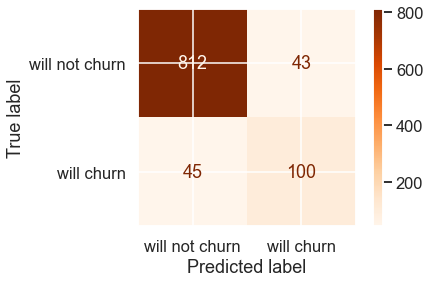

In [185]:
#plotting confusion matrix

plot_confusion_matrix(model_tree,
                      X_test,
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Oranges")

plt.show()

In [186]:
#Perfrom cofusion matrix

confusion_matrix_ = confusion_matrix(y_test, 
                                     y_pred)

print('confusion_matrix: \n', confusion_matrix_)
print()
TN = confusion_matrix_ [0, 0]
print("True Negative = ",TN)

FP= confusion_matrix_ [0, 1]
print("False Positive = ",FP)

FN = confusion_matrix_ [1, 0]
print("False Negative = ",FN)

TP = confusion_matrix_ [1, 1]
print("True Positive = ",TP)

confusion_matrix: 
 [[812  43]
 [ 45 100]]

True Negative =  812
False Positive =  43
False Negative =  45
True Positive =  100


In [187]:

precision_ = np.round(precision_score(y_test,
                                      y_pred), 2)
recall_ = np.round(recall_score(y_test, 
                               y_pred), 2)

f1_score__ = np.round(f1_score(y_test, 
                               y_pred), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1_score = ", f1_score__)


Precision =  0.7
Recall =  0.69
f1_score =  0.69


In [188]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.69
False Positive Rate =  0.05


Accuracy:  0.912
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.70      0.69      0.69       145

    accuracy                           0.91      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



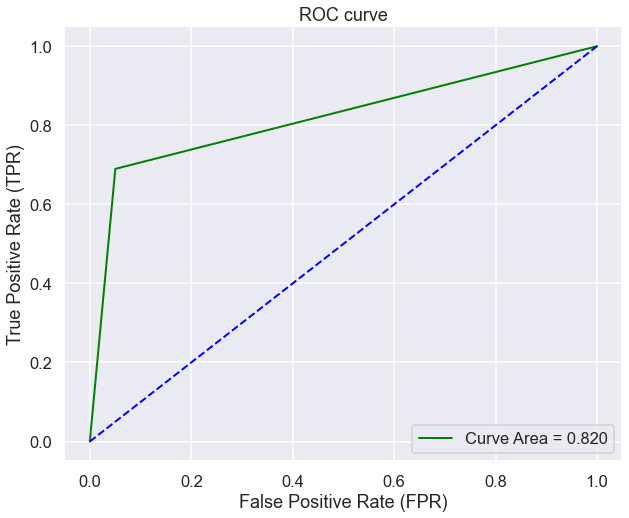

In [189]:
# roc,auc

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, thr = roc_curve(y_test, model_tree.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<h4 style="font-size: 18px;font-family:Times New Roman">Tree diagram of the Decision Tree</h4>

In [190]:
# # Tree Plotting 

# plt.figure(figsize = (15, 12))
# plot_tree(model_tree, 
#           filled=True,
#           rounded=True,
#           class_names = ["Will not Churn", "Will Churn"],
#           feature_names = X.columns,
#           max_depth=2, 
#           fontsize=15)

# plt.show()

<p style="font-size: 18px;font-family:Times New Roman">From upper decision tree we can decide that if a customer's "<b>Day_Mins</b>" is less or equal than 0.751 then two phenomena can happen, one of them is True and another is False. if <b>Day_Mins</b> is true and <b>CustServ_Calls</b> is less of equal than 0.389 then 1939 values is "will not churn" in terms of 2189 sample.The tree will run till the Node become pure node.</p>


<h4 style="font-size: 18px;font-family:Times New Roman">Perform Grid Search and Cross-Validation with Decision Tree Classifier</h4>

In [191]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7, None],
              'max_features': ["auto"]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="recall",
                           cv=5,
                           n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

In [192]:
y_pred = grid_result.predict(X_test)

In [193]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,gini,None,0.735294,0.588235,0.676471,0.611940,0.701493,0.662687,0.054929,1
11,entropy,None,0.514706,0.529412,0.691176,0.507463,0.671642,0.582880,0.080995,2
10,entropy,7,0.323529,0.544118,0.617647,0.507463,0.402985,0.479148,0.104137,3
3,gini,6,0.455882,0.514706,0.470588,0.417910,0.462687,0.464355,0.031002,4
9,entropy,6,0.455882,0.470588,0.367647,0.477612,0.522388,0.458824,0.050702,5
4,gini,7,0.397059,0.558824,0.382353,0.328358,0.447761,0.422871,0.077902,6
8,entropy,5,0.323529,0.411765,0.558824,0.358209,0.343284,0.399122,0.085053,7
2,gini,5,0.308824,0.397059,0.235294,0.223881,0.447761,0.322564,0.088053,8
1,gini,4,0.294118,0.279412,0.308824,0.268657,0.358209,0.301844,0.031273,9
7,entropy,4,0.264706,0.220588,0.397059,0.238806,0.313433,0.286918,0.063312,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


<h4 style="font-size: 18px;font-family:Times New Roman">Show the Confusion Matrix, Classification report, and ROC-AUC</h4>

<h4 style="font-size: 18px;font-family:Times New Roman">Confusion Matrix</h4>

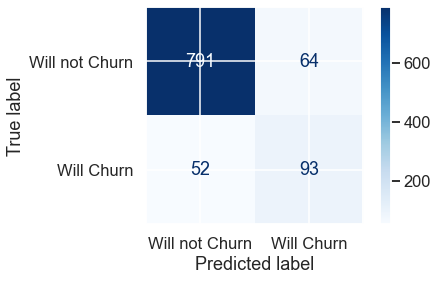

In [194]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not Churn", "Will Churn"],
                      cmap='Blues')
plt.show()

<h4 style="font-size: 18px;font-family:Times New Roman">Classification report</h4>

In [195]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[791  64]
 [ 52  93]]
Accuracy:  0.884
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       855
           1       0.59      0.64      0.62       145

    accuracy                           0.88      1000
   macro avg       0.77      0.78      0.77      1000
weighted avg       0.89      0.88      0.89      1000



<h4 style="font-size: 18px;font-family:Times New Roman">ROC-AUC<h4>

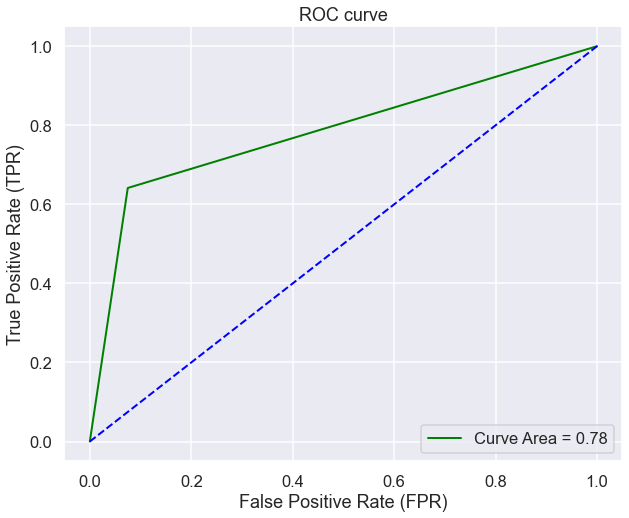

In [196]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<p style="font-size: 18px;font-family:Times New Roman">From upper, noticed that after completing Cross-validation and Grid Search the rate of accuracy, recall, precision, and f1 score all of them is decreased. SO, performing cross-validation and grid search is not good for this model.</p>

<h4 style="font-size: 18px;font-family:Times New Roman">Explain accuracy, precision, recall, f1 score</h4>

<p style="font-size: 18px;font-family:Times New Roman"> <b>Accuracy</b>:accuracy is defined as the number of True Postives (TP) and True Negatives(TN) divided by the True Positives(TP), True Negatives (TN), False Positives(FP) and False Negatives(FN).<br>
accuracy = (TP+TN)/(TN+TP+FN+FP).
<br><br>
<b>Precision</b>: Precision is defined as the number of True Postives divided by True Positives(TP) and False Positives(FP).<br>
precision = (TP)/(TP+FP).
<br><br>
<b>Recall</b>:Recall is defined as the number of True Postives divided by True Positives(TP) and False Negatives(FN).<br>
Recall = TP/(TP+FN)
<br><br>
<b>F1 score</b>: F1 score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
</p>